In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
lung_data = pd.read_csv(r"dataset\survey lung cancer.csv")

In [26]:
lung_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gen = le.fit_transform(lung_data["GENDER"])
output = le.fit_transform(lung_data["LUNG_CANCER"])
lung_data["GENDER"] = gen
lung_data["LUNG_CANCER"] = output
lung_data


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


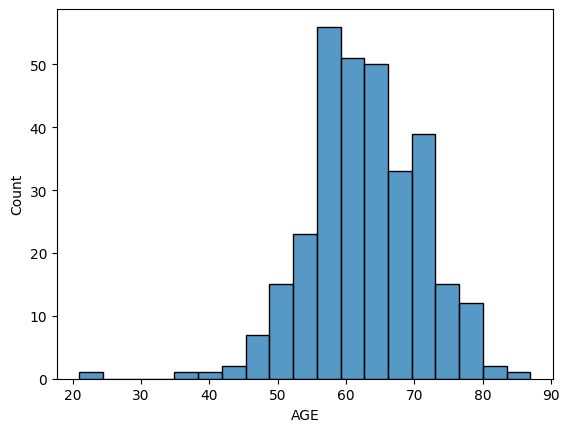

In [7]:
sns.histplot(lung_data["AGE"])
plt.show()

In [8]:
x = lung_data.drop("LUNG_CANCER", axis = 1)
y = lung_data["LUNG_CANCER"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### LOGISTIC REGRESSION MODEL

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
lr.score(x_test, y_test)

0.9838709677419355

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[ 1  1]
 [ 0 60]]
Accuracy: 98.38709677419355 %

Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



#### SAVING THE MODEL ✈️

In [13]:
import pickle
pickle.dump(lr,open("lung_cancer.pkl","wb"))

#### RANDOM FOREST MODEL

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
rf.score(x_test, y_test)

0.967741935483871

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[ 1  1]
 [ 1 59]]
Accuracy: 96.7741935483871 %

Report:               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



#### SVC MODEL

In [17]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)


SVC()

In [20]:
svc.score(x_test, y_test)

0.967741935483871

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[ 0  2]
 [ 0 60]]
Accuracy: 96.7741935483871 %

Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i